### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

### Importing Training Set

In [2]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = training_set.iloc[:,1:2].values #Getting open stock prices

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler()

In [7]:
training_set = sc.fit_transform(training_set)

### Getting Inputs & Outputs

In [8]:
training_set.shape

(1258, 1)

In [9]:
X_train = training_set[0:1257]  #Stock Price at time T

In [10]:
y_train = training_set[1:1258]  #Prediction for Stock Price at time T+1

### Reshaping X_train to include timestamp alongwith no of observations & no of features

In [11]:
X_train.shape

(1257, 1)

In [12]:
X_train = np.reshape(X_train,(1257,1,1)) #Second Dimension is Timestamp = 1

In [13]:
X_train.shape

(1257, 1, 1)

## Building RNN

### Importing Libraries

In [14]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [15]:
regressor = Sequential()

#### Adding the Input Layer & the LSTM Layer

In [16]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1))) #None referes to the timestamp, shows that model can accept any timestamp can also be specified as 1 since our model uses 1 timestamp

#### Adding the Output Layer

In [17]:
regressor.add(Dense(units=1))

#### Compiling RNN

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#### Fitting RNN

In [19]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 695us/step - loss: 0.2219
Epoch 2/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.1565
Epoch 3/200
1257/1257 [==============================] - 0s 94us/step - loss: 0.1153
Epoch 4/200
1257/1257 [==============================] - 0s 93us/step - loss: 0.0923
Epoch 5/200
1257/1257 [==============================] - 0s 92us/step - loss: 0.0801
Epoch 6/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0738
Epoch 7/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0708
Epoch 8/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.0690
Epoch 9/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.0676
Epoch 10/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0663
Epoch 11/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0649
Epoch 12/200
1257/1257 [==============================] - 0s 

1257/1257 [==============================] - 0s 94us/step - loss: 2.5005e-04
Epoch 95/200
1257/1257 [==============================] - 0s 88us/step - loss: 2.5022e-04
Epoch 96/200
1257/1257 [==============================] - 0s 102us/step - loss: 2.4970e-04
Epoch 97/200
1257/1257 [==============================] - 0s 106us/step - loss: 2.4945e-04
Epoch 98/200
1257/1257 [==============================] - 0s 135us/step - loss: 2.4937e-04
Epoch 99/200
1257/1257 [==============================] - 0s 145us/step - loss: 2.4943e-04
Epoch 100/200
1257/1257 [==============================] - 0s 99us/step - loss: 2.4898e-04
Epoch 101/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.4889e-04
Epoch 102/200
1257/1257 [==============================] - 0s 123us/step - loss: 2.4935e-04
Epoch 103/200
1257/1257 [==============================] - 0s 110us/step - loss: 2.4862e-04
Epoch 104/200
1257/1257 [==============================] - 0s 87us/step - loss: 2.4907e-04
Epoch 105/20

Epoch 184/200
1257/1257 [==============================] - 0s 87us/step - loss: 2.5026e-04
Epoch 185/200
1257/1257 [==============================] - 0s 88us/step - loss: 2.4576e-04
Epoch 186/200
1257/1257 [==============================] - 0s 84us/step - loss: 2.4715e-04
Epoch 187/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.4680e-04
Epoch 188/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.4630e-04
Epoch 189/200
1257/1257 [==============================] - 0s 83us/step - loss: 2.5066e-04
Epoch 190/200
1257/1257 [==============================] - 0s 83us/step - loss: 2.4425e-04
Epoch 191/200
1257/1257 [==============================] - 0s 84us/step - loss: 2.4704e-04
Epoch 192/200
1257/1257 [==============================] - 0s 89us/step - loss: 2.4599e-04
Epoch 193/200
1257/1257 [==============================] - 0s 85us/step - loss: 2.4968e-04
Epoch 194/200
1257/1257 [==============================] - 0s 85us/step - loss: 2.5059e-04

### Making Predictions

### Importing Test Set

In [20]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')

In [21]:
test_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [22]:
real_stock_price = test_set.iloc[:,1:2].values

In [23]:
inputs = real_stock_price

#### Scaling Test Data

In [24]:
inputs = sc.transform(inputs)

In [25]:
inputs.shape

(20, 1)

#### Reshaping Test Data

In [26]:
inputs = np.reshape(inputs,(20,1,1))

#### Prediction

In [27]:
predicted_stock_price = regressor.predict(inputs)

In [28]:
predicted_stock_price

array([[ 0.92974162],
       [ 0.94636422],
       [ 0.94239753],
       [ 0.95836049],
       [ 0.97770476],
       [ 0.98023778],
       [ 0.97527534],
       [ 0.97898859],
       [ 0.97957855],
       [ 0.97888458],
       [ 0.97668111],
       [ 0.97548366],
       [ 0.97858965],
       [ 0.97917962],
       [ 1.00526392],
       [ 1.01793158],
       [ 1.03209031],
       [ 1.02673292],
       [ 0.99202895],
       [ 0.96114063]], dtype=float32)

In [29]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #Bringing to the same scale as original data

#### Visualising Results

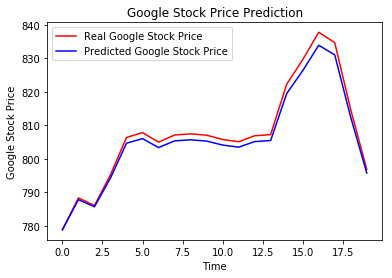

In [30]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()